In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
from scipy import stats
import numpy as np 

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataVisualization/master/dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
data.shape

(1470, 35)

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
print('Unique Attrition Values: ' + str(data.Attrition.unique()) + '\n')
print('Unique Business Travel Values: ' + str(data.BusinessTravel.unique()) + '\n')
print('Unique Dept Values: ' + str(data.Department.unique()) + '\n')
print('Unique Education Field Values: ' + str(data.EducationField.unique()) + '\n')
print('Unique Gender Values: ' + str(data.Gender.unique()) + '\n')
print('Unique Job Role Values: ' + str(data.JobRole.unique()) + '\n')
print('Unique Marital Status Values: ' + str(data.MaritalStatus.unique()) + '\n')
print('Unique Over18 Values: ' + str(data.Over18.unique()) + '\n')
print('Unique OverTime Values: ' + str(data.OverTime.unique()) + '\n')

Unique Attrition Values: ['Yes' 'No']

Unique Business Travel Values: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Unique Dept Values: ['Sales' 'Research & Development' 'Human Resources']

Unique Education Field Values: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

Unique Gender Values: ['Female' 'Male']

Unique Job Role Values: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

Unique Marital Status Values: ['Single' 'Married' 'Divorced']

Unique Over18 Values: ['Y']

Unique OverTime Values: ['Yes' 'No']



In [7]:
data.drop(columns=["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], inplace=True)
data.shape  

(1470, 31)

In [8]:

data.Attrition.replace({'Yes': 1, 'No': 0}, inplace=True)
data.BusinessTravel.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)
data.Department.replace({'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}, inplace=True)
data.Gender.replace({'Female': 0, 'Male': 1}, inplace=True)
data.MaritalStatus.replace({'Single': 0,'Married': 1, 'Divorced': 2}, inplace=True)
data.OverTime.replace({'No': 0, 'Yes': 1}, inplace=True)
data.EducationField.replace({'Life Sciences': 0, 'Medical': 1, 'Marketing': 2, 'Technical Degree': 3, 'Human Resources': 4, 'Other': 5}, inplace=True)
data.JobRole.replace({
    'Sales Executive': 0, 
    'Research Scientist': 1, 
    'Laboratory Technician': 2,
    'Manufacturing Director': 3,
    'Healthcare Representative': 4,
    'Manager': 5,
    'Sales Representative': 6,
    'Research Director': 7,
    'Human Resources': 8
}, inplace=True)

In [9]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.153741,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,1.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [10]:
temp = None
temp = pd.DataFrame({
    "Median Values": data.median(), 
    "Mean Values": data.mean(), 
    "Standard Deviation": data.std(),
    "Skewness": data.skew() # Ideal range: -1 to +1
})

# Sort values based on skewness
temp = temp.sort_values(by='Skewness')

temp.head(50)

,Median Values,Mean Values,Standard Deviation,Skewness
WorkLifeBalance,3.0,2.761224,0.706476,-0.552480
JobInvolvement,3.0,2.729932,0.711561,-0.498419
Gender,1.0,0.600000,0.490065,-0.408665
JobSatisfaction,3.0,2.728571,1.102846,-0.329672
EnvironmentSatisfaction,3.0,2.721769,1.093082,-0.321654
RelationshipSatisfaction,3.0,2.712245,1.081209,-0.302828
Education,3.0,2.912925,1.024165,-0.289681
Department,1.0,0.739456,0.527792,-0.172231
HourlyRate,66.0,65.891156,20.329428,-0.032311
DailyRate,802.0,802.485714,403.509100,-0.003519


In [11]:
data.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,802.485714,0.739456,9.192517,2.912925,1.153741,2.721769,0.600000,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,403.509100,0.527792,8.106864,1.024165,1.383865,1.093082,0.490065,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,802.000000,1.000000,7.000000,3.000000,1.000000,3.000000,1.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,1157.000000,1.000000,14.000000,4.000000,2.000000,4.000000,1.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,4.000000,1.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Percentage of NO Values: 83.87755102040816
Percentage of YES Values: 16.122448979591837


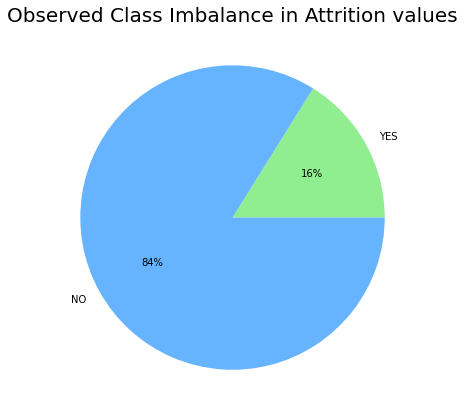

In [12]:
total_rows = data.shape[0]
no_val = data.Attrition.value_counts()[0]
yes_val = data.Attrition.value_counts()[1]
print('Percentage of NO Values: ' + str((no_val/total_rows) * 100))
print('Percentage of YES Values: ' + str((yes_val/total_rows) * 100))

plt.figure(figsize = (7, 7))
plt.pie([yes_val, no_val], labels=['YES', 'NO'], autopct='%1.0f%%', colors = ['lightgreen','#66b3ff'])
plt.title("Observed Class Imbalance in Attrition values", fontsize=20)
plt.show()

1    882
0    588
Name: Gender, dtype: int64


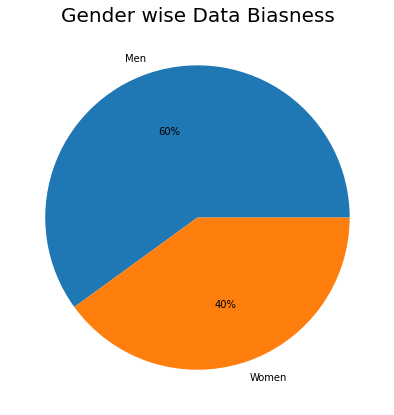

In [13]:
print(data.Gender.value_counts())

total = data.Gender.value_counts()[0] + data.Gender.value_counts()[1]
per_men_data = (data.Gender.value_counts()[1] / total) * 100 
per_women_data = (data.Gender.value_counts()[0] / total) * 100 

plt.figure(figsize = (7, 7))
plt.pie([per_men_data, per_women_data], labels=['Men', 'Women'], autopct='%1.0f%%')
plt.title('Gender wise Data Biasness', fontsize=20)
plt.show()

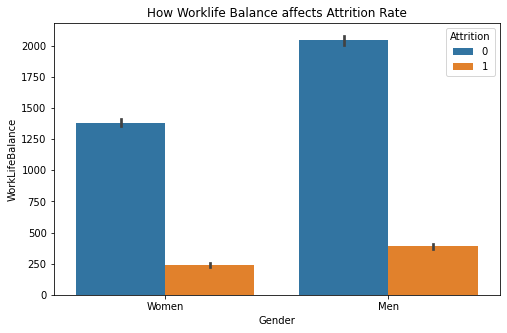

In [14]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.WorkLifeBalance, estimator = np.sum, hue = data.Attrition)
ax.set_xticklabels(('Women', 'Men'))
plt.title('How Worklife Balance affects Attrition Rate')
plt.show()

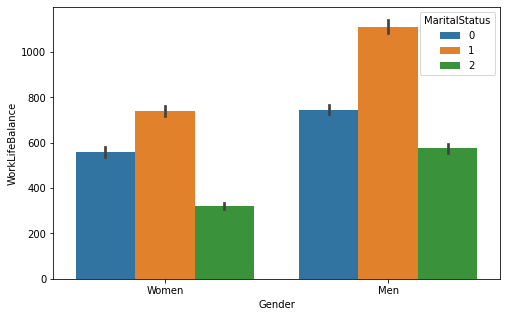

In [15]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.WorkLifeBalance, estimator = np.sum, hue = data.MaritalStatus)
ax.set_xticklabels(('Women', 'Men'))
plt.show()

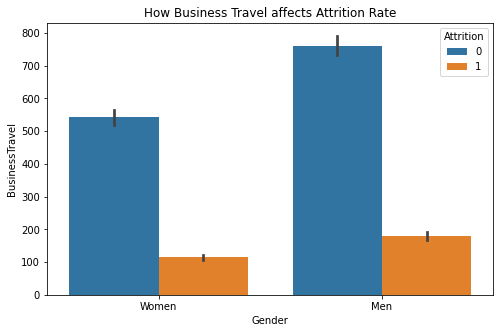

In [16]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x = data.Gender , y = data.BusinessTravel, estimator = np.sum, hue = data.Attrition)
ax.set_xticklabels(('Women', 'Men'))
plt.title('How Business Travel affects Attrition Rate')
plt.show()

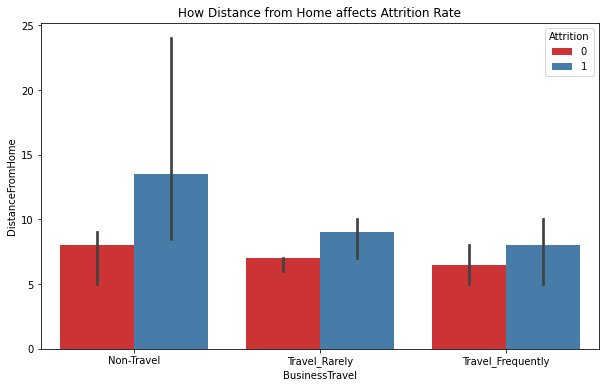

In [17]:
plt.figure(figsize=(10, 6))
plt.title('How Distance from Home affects Attrition Rate')
ax = sns.barplot(x = data.BusinessTravel , y = data.DistanceFromHome, estimator = np.median, hue = data.Attrition, palette='Set1')
ax.set_xticklabels(('Non-Travel', 'Travel_Rarely', 'Travel_Frequently'))
plt.show()

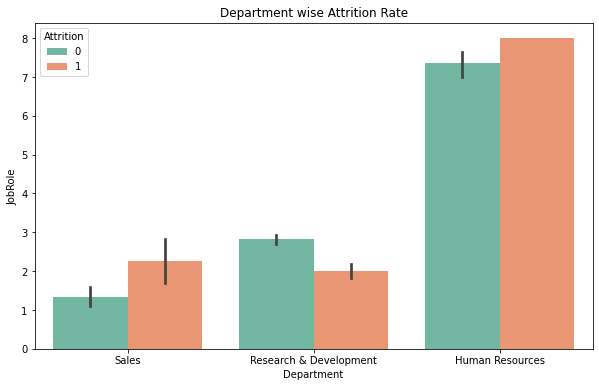

In [18]:
plt.figure(figsize=(10, 6))
plt.title('Department wise Attrition Rate')
ax = sns.barplot(x=data.Department, y=data.JobRole, hue=data.Attrition, orient='v', palette='Set2')
ax.set_xticklabels(('Sales', 'Research & Development', 'Human Resources'))
plt.show()

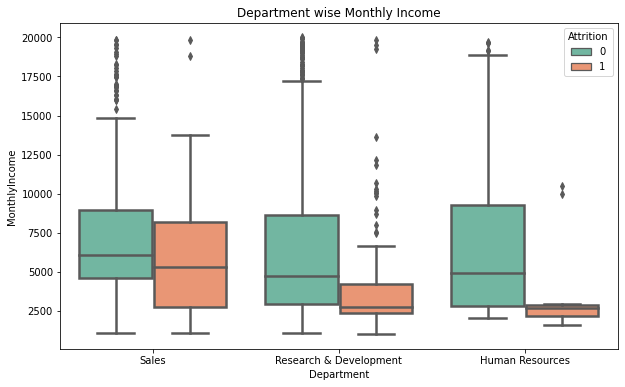

In [19]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=data.Department, y=data.MonthlyIncome, hue=data.Attrition, data=data, linewidth=2.5, palette='Set2')
ax.set_xticklabels(('Sales', 'Research & Development', 'Human Resources'))
plt.title('Department wise Monthly Income')
plt.show()

<AxesSubplot:title={'center':'Correlation between variables'}>

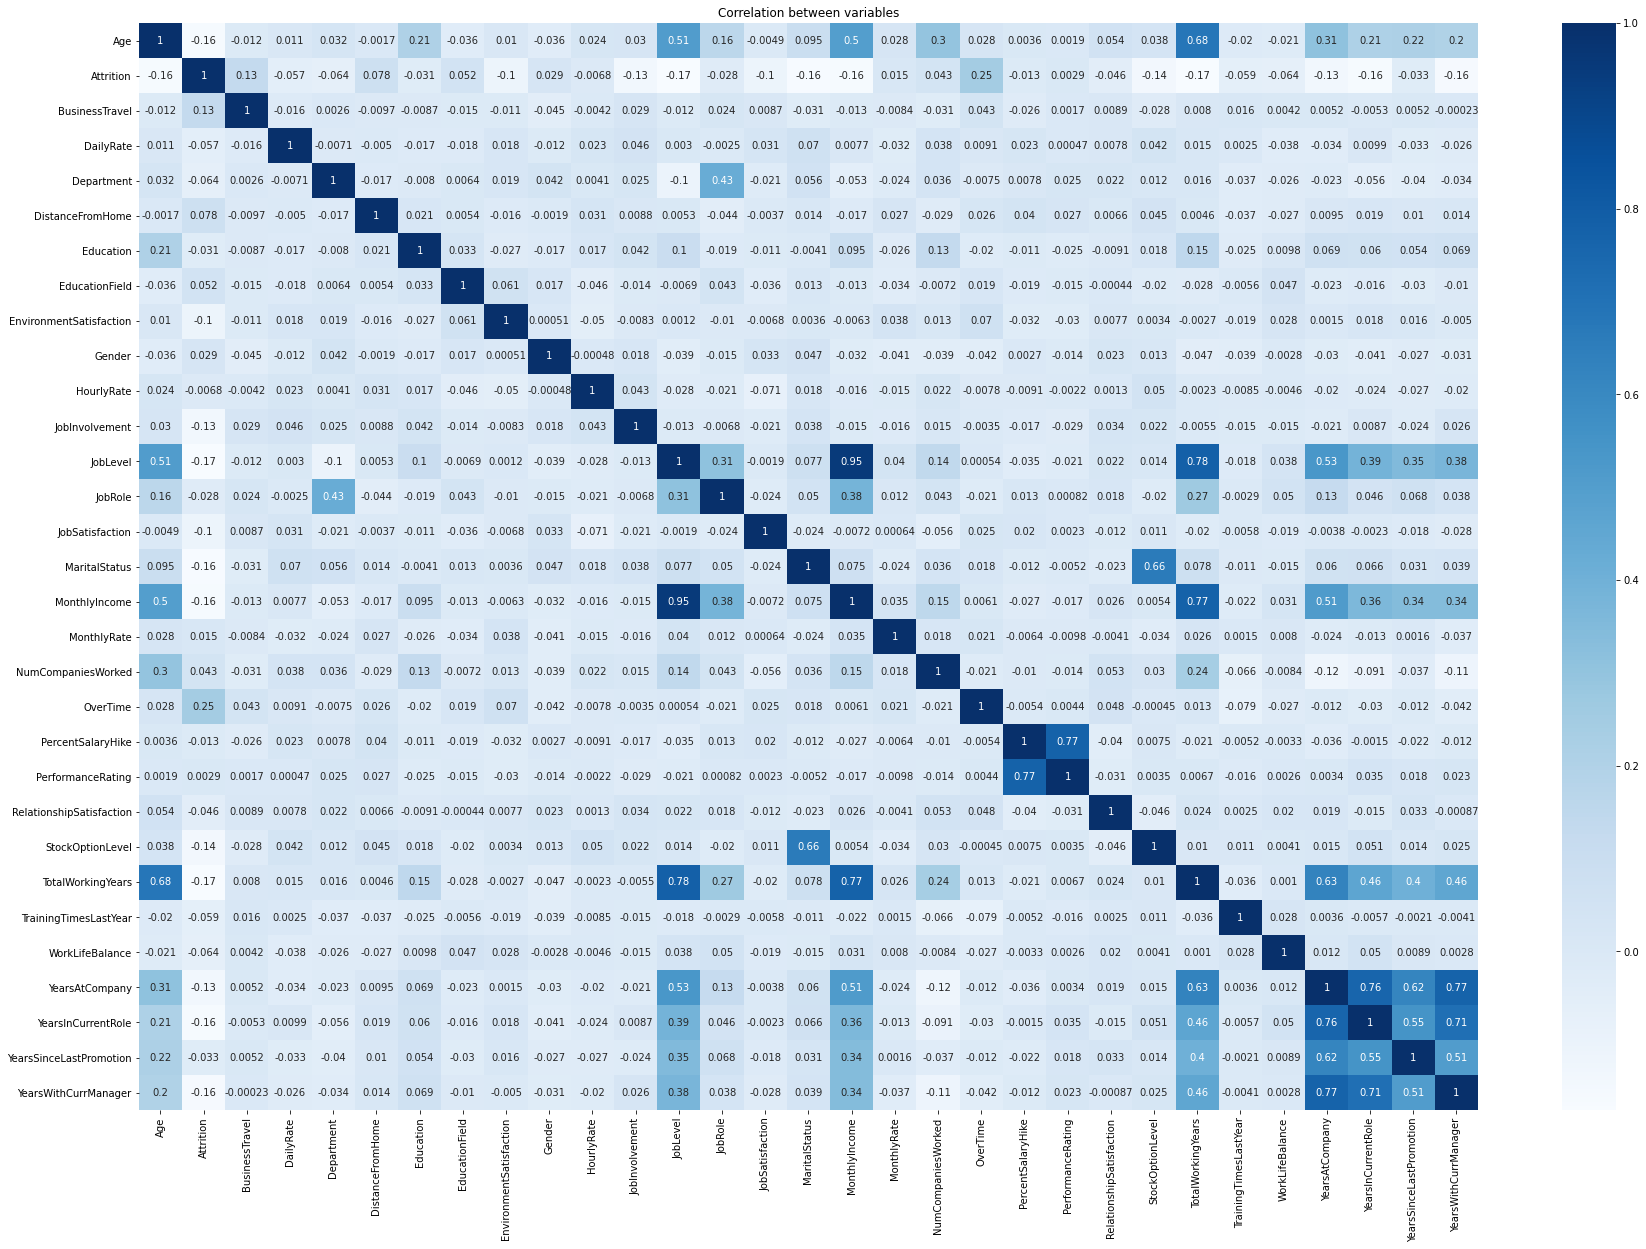

In [20]:
plt.figure(figsize=(30, 20))
plt.title('Correlation between variables')
sns.heatmap(data.corr(), annot=True, cmap='Blues')

In [21]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [22]:
from sklearn.model_selection import train_test_split
data_x = data.iloc[:, 0:30]
data_y = data.iloc[:, 1]

data_x.drop(columns=["Attrition"], inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = .2, random_state=20)
print("-----------------------")
print(data_x_train.shape)
print(data_y_train.shape)
print("-----------------------")
print(data_x_test.shape)
print(data_y_test.shape)
print("-----------------------")

-----------------------
(1176, 29)
(1176,)
-----------------------
(294, 29)
(294,)
-----------------------


Before OverSampling, counts of label '1': 186
Before OverSampling, counts of label '0': 990 

After OverSampling, the shape of oversampled_x_train: (1980, 29)
After OverSampling, the shape of oversampled_y_train: (1980,) 

After OverSampling, counts of label '1': 990
After OverSampling, counts of label '0': 990


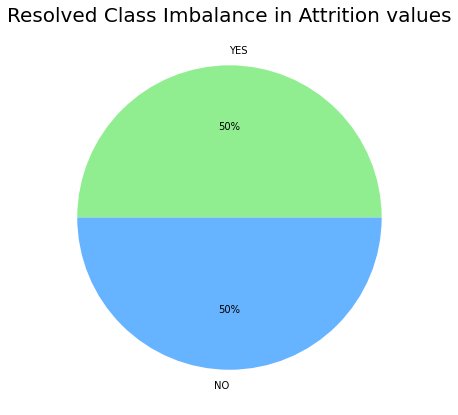

In [24]:
print("Before OverSampling, counts of label '1': {}".format(sum(data_y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(data_y_train == 0))) 
  
# import SMOTE module from imblearn library 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
oversampled_x_train, oversampled_y_train = sm.fit_resample(data_x_train, data_y_train)

print("After OverSampling, the shape of oversampled_x_train: {}".format(oversampled_x_train.shape))
print("After OverSampling, the shape of oversampled_y_train: {} \n".format(oversampled_y_train.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(oversampled_y_train == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(oversampled_y_train == 0))) 

oversampled_y_train = pd.Series(oversampled_y_train)


# Plot on a Pie chart
total_rows = data.shape[0]

plt.figure(figsize = (7, 7))
plt.pie([sum(oversampled_y_train == 1), sum(oversampled_y_train == 0)], labels=['YES', 'NO'], autopct='%1.0f%%', colors = ['lightgreen','#66b3ff'])
plt.title("Resolved Class Imbalance in Attrition values", fontsize=20)
plt.show()

In [25]:
oversampled_x_train.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,38,1,330,1,17,1,0,3,0,65,...,18,3,1,1,20,4,2,19,9,1
1,39,0,592,1,2,3,0,1,0,54,...,23,4,2,0,11,2,4,1,0,0
2,30,2,1012,1,5,4,0,2,1,75,...,12,3,2,1,10,3,2,5,4,0
3,36,2,1213,2,2,1,4,2,1,94,...,21,4,4,0,10,2,2,10,1,0
4,23,1,1243,1,6,3,0,3,1,63,...,21,4,3,2,1,2,3,0,0,0


Accuracy: 0.6836734693877551
Precision: 0.26136363636363635
Sensitivity: 0.45098039215686275
Specificity: 0.7325102880658436
ROC AUC Score: 0.5917453401113532
F1 Score: 0.33093525179856115


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,Actual Values,Predicted Values
1059,0,1
1374,0,0
326,0,0
283,0,0
855,0,0


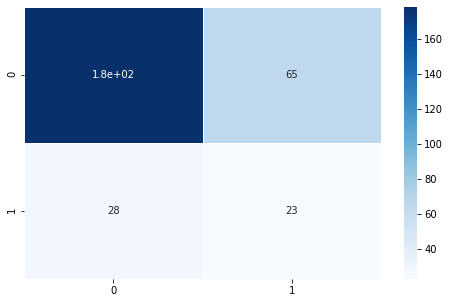

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(class_weight='balanced')

log_reg.fit(oversampled_x_train, oversampled_y_train)

# Predict values based on this fittest model
log_pred = log_reg.predict(data_x_test)

from sklearn.metrics import confusion_matrix, roc_auc_score
log_conf = confusion_matrix(data_y_test, log_pred)

# Visulize this Confusion Matrix neatly using seaborn
plt.figure(figsize = (8,5))
sns.heatmap(log_conf, annot=True, cmap='Blues', linewidths=.5)

log_accuracy = log_conf.diagonal().sum() / log_conf.sum()
print("Accuracy: " + str(log_accuracy))

log_prec = log_conf[1,1] / (log_conf[0,1] + (log_conf[1,1]))
print("Precision: " + str(log_prec))

log_sens = log_conf[1,1] / (log_conf[1,0] + (log_conf[1,1]))
print("Sensitivity: " + str(log_sens))

log_spec = log_conf[0,0] / (log_conf[0,0] + (log_conf[0,1]))
print("Specificity: " + str(log_spec))

log_roc_auc_score = roc_auc_score(data_y_test, log_pred)
print("ROC AUC Score: " + str(log_roc_auc_score))

log_F1 = 2 * (log_prec * log_sens) / (log_prec + log_sens)
print('F1 Score: ' + str(log_F1))

results_normalized = pd.DataFrame({"Actual Values":data_y_test,"Predicted Values":log_pred})
results_normalized.tail()

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:30:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.8571428571428571
Precision: 0.6285714285714286
Sensitivity: 0.43137254901960786
Specificity: 0.9465020576131687
ROC AUC Score: 0.5917453401113532
F1 Score: 0.5116279069767442


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Actual Values,Predicted Values
1059,0,1
1374,0,0
326,0,0
283,0,0
855,0,0


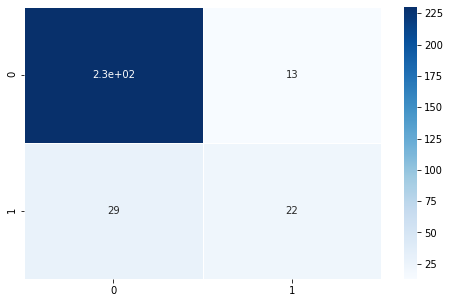

In [27]:

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


# fit model no training data
xg_model = XGBClassifier()
xg_model.fit(oversampled_x_train, oversampled_y_train)


# Prediction using XGBoost
y_pred = xg_model.predict(data_x_test)
predictions = [round(value) for value in y_pred]


# Evaluate predictions
xg_log_conf = confusion_matrix(data_y_test, predictions)

# Visulize this Confusion Matrix neatly using seaborn
plt.figure(figsize = (8,5))
sns.heatmap(xg_log_conf, annot=True, cmap='Blues', linewidths=.5)

xg_log_accuracy = xg_log_conf.diagonal().sum() / log_conf.sum()
print("Accuracy: " + str(xg_log_accuracy))

xg_log_prec = xg_log_conf[1,1] / (xg_log_conf[0,1] + (xg_log_conf[1,1]))
print("Precision: " + str(xg_log_prec))

xg_log_sens = xg_log_conf[1,1] / (xg_log_conf[1,0] + (xg_log_conf[1,1]))
print("Sensitivity: " + str(xg_log_sens))

xg_log_spec = xg_log_conf[0,0] / (xg_log_conf[0,0] + (xg_log_conf[0,1]))
print("Specificity: " + str(xg_log_spec))

xg_log_roc_auc_score = roc_auc_score(data_y_test, log_pred)
print("ROC AUC Score: " + str(xg_log_roc_auc_score))

xg_log_F1 = 2 * (xg_log_prec * xg_log_sens) / (xg_log_prec + xg_log_sens)
print('F1 Score: ' + str(xg_log_F1))

results_normalized = pd.DataFrame({"Actual Values":data_y_test,"Predicted Values":log_pred})
results_normalized.tail()

Accuracy: 0.7551020408163265
Precision: 0.34328358208955223
Sensitivity: 0.45098039215686275
Specificity: 0.8189300411522634
ROC AUC Score: 0.634955216654563
F1 Score: 0.38983050847457623


,Actual Values,Predicted Values
1059,0,0
1374,0,0
326,0,0
283,0,1
855,0,0


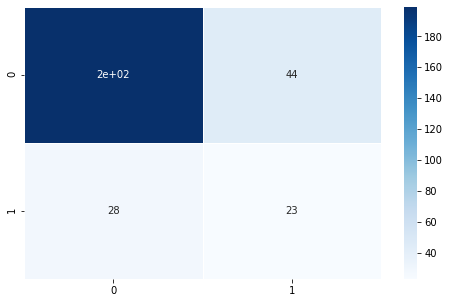

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(oversampled_x_train, oversampled_y_train)

dt_pred = dt.predict(data_x_test)
dt_conf = confusion_matrix(data_y_test, dt_pred)

# Visulize this Confusion Matrix neatly using seaborn
plt.figure(figsize = (8, 5))
sns.heatmap(dt_conf, annot=True, cmap='Blues', linewidths=.5)

dt_accuracy = dt_conf.diagonal().sum() / dt_conf.sum()
print("Accuracy: " + str(dt_accuracy))

dt_prec = dt_conf[1,1] / (dt_conf[0,1] + (dt_conf[1,1]))
print("Precision: " + str(dt_prec))

dt_sens = dt_conf[1,1] / (dt_conf[1,0] + (dt_conf[1,1]))
print("Sensitivity: " + str(dt_sens))

dt_spec = dt_conf[0,0] / (dt_conf[0,0] + (dt_conf[0,1]))
print("Specificity: " + str(dt_spec))

dt_roc_auc_score = roc_auc_score(data_y_test, dt_pred)
print("ROC AUC Score: " + str(dt_roc_auc_score))

dt_F1 = 2 * (dt_prec * dt_sens) / (dt_prec + dt_sens)
print('F1 Score: ' + str(dt_F1))

results_normalized = pd.DataFrame({"Actual Values":data_y_test,"Predicted Values":dt_pred})
results_normalized.tail()

Accuracy: 0.8299319727891157
Precision: 0.5128205128205128
Sensitivity: 0.39215686274509803
Specificity: 0.9218106995884774
ROC AUC Score: 0.6569837811667877
F1 Score: 0.4444444444444445


,Actual Values,Predicted Values
1059,0,0
1374,0,0
326,0,0
283,0,0
855,0,0


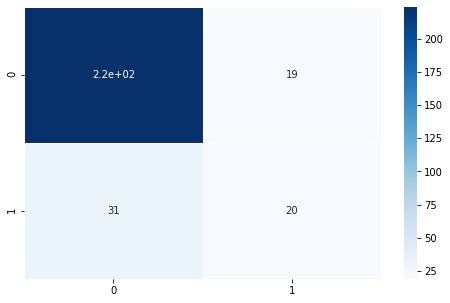

In [29]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(oversampled_x_train, oversampled_y_train)

rf_pred = rf.predict(data_x_test)
rf_conf = confusion_matrix(data_y_test, rf_pred)

# Visulize this Confusion Matrix neatly using seaborn
plt.figure(figsize = (8,5))
sns.heatmap(rf_conf, annot=True, cmap='Blues', linewidths=.5)

rf_accuracy = rf_conf.diagonal().sum() / rf_conf.sum()
print("Accuracy: " + str(rf_accuracy))

rf_prec = rf_conf[1,1] / (rf_conf[0,1] + (rf_conf[1,1]))
print("Precision: " + str(rf_prec))

rf_sens = rf_conf[1,1] / (rf_conf[1,0] + (rf_conf[1,1]))
print("Sensitivity: " + str(rf_sens))

rf_spec = rf_conf[0,0] / (rf_conf[0,0] + (rf_conf[0,1]))
print("Specificity: " + str(rf_spec))

rf_roc_auc_score = roc_auc_score(data_y_test, rf_pred)
print("ROC AUC Score: " + str(rf_roc_auc_score))

rf_F1 = 2 * (rf_prec * rf_sens) / (rf_prec + rf_sens)
print('F1 Score: ' + str(rf_F1))

results_normalized = pd.DataFrame({"Actual Values":data_y_test,"Predicted Values":rf_pred})
results_normalized.tail()

In [30]:
results = [
    ["Logistic Regression", log_accuracy, log_spec, log_prec, log_sens, log_roc_auc_score, log_F1],
    ["XGBoost", xg_log_accuracy, xg_log_spec, xg_log_prec, xg_log_sens, xg_log_roc_auc_score, xg_log_F1],
    ["Decision Tree", dt_accuracy, dt_spec, dt_prec, dt_sens, dt_roc_auc_score, dt_F1],
    ["Random Forest", rf_accuracy, rf_spec, rf_prec, rf_sens, rf_roc_auc_score, rf_F1],
]

results_df = pd.DataFrame(results, columns=["Name", "Accuracy", "Specificity", "Precision", "Sensitivity", "ROC AUC Score", "F1 Score"])
results_df

,Name,Accuracy,Specificity,Precision,Sensitivity,ROC AUC Score,F1 Score
0,Logistic Regression,0.683673,0.732510,0.261364,0.450980,0.591745,0.330935
1,XGBoost,0.857143,0.946502,0.628571,0.431373,0.591745,0.511628
2,Decision Tree,0.755102,0.818930,0.343284,0.450980,0.634955,0.389831
3,Random Forest,0.829932,0.921811,0.512821,0.392157,0.656984,0.444444


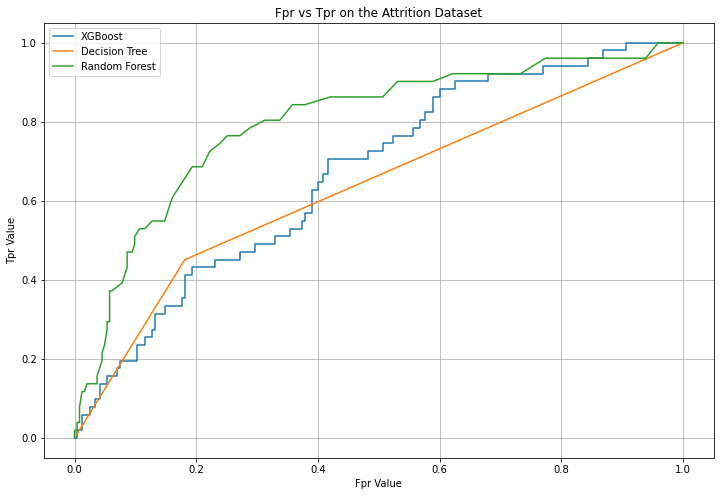

AUCROC Score using XGBoost: 0.5917453401113532
AUCROC Score for Decision Tree: 0.634955216654563
AUCROC Score for Random Forest: 0.6569837811667877


In [31]:
from sklearn.metrics import roc_curve

# Calculate FPR, TPR, THRESHOLD for Logistic Regression Model 
log_pred_prob = log_reg.predict_proba(data_x_test)  # Build on our Test data
log_fpr, log_tpr, log_thre = roc_curve(data_y_test, log_pred_prob[:, 1])

# Calculate FPR, TPR, THRESHOLD for Decision Tree Model 
dt_pred_prob = dt.predict_proba(data_x_test)  # Build on our Test data
dt_fpr, dt_tpr, dt_thre = roc_curve(data_y_test, dt_pred_prob[:, 1])

# Calculate FPR, TPR, THRESHOLD for Random Forest Model 
rf_pred_prob = rf.predict_proba(data_x_test)  # Build on our Test data
rf_fpr, rf_tpr, rf_thre = roc_curve(data_y_test, rf_pred_prob[:, 1])

roc_plot_df = pd.DataFrame({
    "FPR": [log_fpr, dt_fpr, rf_fpr],
    "TPR": [log_tpr, dt_tpr, rf_tpr],
})


fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(log_fpr,log_tpr)
ax.plot(dt_fpr,dt_tpr)
ax.plot(rf_fpr,rf_tpr)

ax.grid(True)
ax.set_title('Fpr vs Tpr on the Attrition Dataset')
ax.legend(['XGBoost', 'Decision Tree', 'Random Forest'])
ax.xaxis.set_label_text('Fpr Value')
ax.yaxis.set_label_text('Tpr Value')

plt.show()


print("AUCROC Score using XGBoost: " + str(log_roc_auc_score))
print("AUCROC Score for Decision Tree: " + str(dt_roc_auc_score))
print("AUCROC Score for Random Forest: " + str(rf_roc_auc_score))

In [32]:
from sklearn.model_selection import cross_val_score
temp_df = []

################ Calculate Score for Logistic Regression
score_log_reg = cross_val_score(log_reg, data_x, data_y, scoring='accuracy', cv=5)


################ Calculate Score for XGBoost
score_xg_reg = cross_val_score(xg_model, data_x, data_y, scoring='accuracy', cv=5)


################ Calculate Score for Decision Tree
score_dt = cross_val_score(dt, data_x, data_y, scoring='accuracy', cv=5)


############### Calculate Score for Random Forest
score_rf = cross_val_score(rf, data_x, data_y, scoring='accuracy', cv=5)


# Create a Dataframe
results = [
    ["Logistic Regression", score_log_reg.mean(), score_log_reg.min(), score_log_reg.max()],
    ["XGBoost", score_xg_reg.mean(), score_xg_reg.min(), score_xg_reg.max()],
    ["Decision Tree", score_dt.mean(), score_dt.min(), score_dt.max()],
    ["Random Forest", score_rf.mean(), score_rf.min(), score_rf.max()],
]

results_df = pd.DataFrame(results, columns=["Name", "Mean Accuracy", "Minimum Accuracy", "Maximum Accuracy"])
results_df

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[16:30:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[16:30:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:30:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
/opt/conda/lib/python3.7/site-pa

[16:30:50] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


,Name,Mean Accuracy,Minimum Accuracy,Maximum Accuracy
0,Logistic Regression,0.631973,0.598639,0.676871
1,XGBoost,0.870068,0.857143,0.891156
2,Decision Tree,0.806122,0.789116,0.826531
3,Random Forest,0.858503,0.853741,0.863946
